In [509]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [510]:
warnings.filterwarnings('ignore')

In [511]:
data = pd.read_csv("/content/JSWSTEEL.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2005-03-23,JSWSTL,EQ,10.00,455.00,458.50,383.60,386.9,390.15,419.86,2087710,8.765375e+13,NaN,382057,0.1830
1,2005-03-24,JSWSTL,EQ,390.15,392.85,398.50,357.50,371.8,369.20,372.01,1226479,4.562638e+13,NaN,232172,0.1893
2,2005-03-28,JSWSTL,EQ,369.20,376.70,394.05,375.00,380.0,378.85,383.64,1235794,4.741048e+13,NaN,263415,0.2132
3,2005-03-29,JSWSTL,EQ,378.85,382.90,383.80,363.25,369.1,368.05,375.26,624072,2.341915e+13,NaN,198916,0.3187
4,2005-03-30,JSWSTL,EQ,368.05,367.00,371.90,360.05,362.7,362.15,365.13,466349,1.702775e+13,NaN,159641,0.3423


In [512]:
data.drop(['Date'], axis=1, inplace=True)

In [513]:
print(data.head())
print(data.shape)
print(data.columns)

   Symbol Series  Prev Close    Open    High     Low   Last   Close    VWAP  \
0  JSWSTL     EQ       10.00  455.00  458.50  383.60  386.9  390.15  419.86   
1  JSWSTL     EQ      390.15  392.85  398.50  357.50  371.8  369.20  372.01   
2  JSWSTL     EQ      369.20  376.70  394.05  375.00  380.0  378.85  383.64   
3  JSWSTL     EQ      378.85  382.90  383.80  363.25  369.1  368.05  375.26   
4  JSWSTL     EQ      368.05  367.00  371.90  360.05  362.7  362.15  365.13   

    Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  2087710  8.765375e+13     NaN              382057       0.1830  
1  1226479  4.562638e+13     NaN              232172       0.1893  
2  1235794  4.741048e+13     NaN              263415       0.2132  
3   624072  2.341915e+13     NaN              198916       0.3187  
4   466349  1.702775e+13     NaN              159641       0.3423  
(3994, 14)
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 

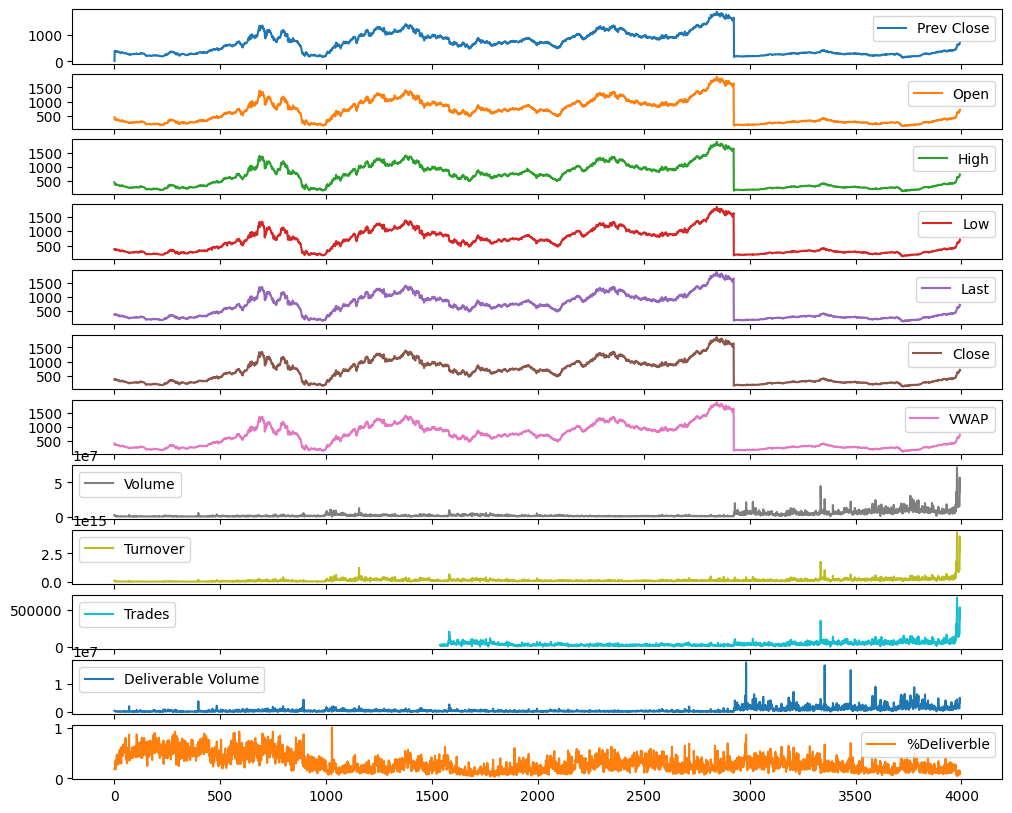

Symbol                   2
Series                   1
Prev Close            3536
Open                  2717
High                  3146
Low                   3200
Last                  3163
Close                 3536
VWAP                  3905
Volume                3989
Turnover              3994
Trades                2405
Deliverable Volume    3982
%Deliverble           2778
dtype: int64

In [514]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [515]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,JSWSTL,EQ,10.00,455.00,458.50,383.60,386.9,390.15,419.86,2087710,8.765375e+13,NaN,382057,0.1830
1,JSWSTL,EQ,390.15,392.85,398.50,357.50,371.8,369.20,372.01,1226479,4.562638e+13,NaN,232172,0.1893
2,JSWSTL,EQ,369.20,376.70,394.05,375.00,380.0,378.85,383.64,1235794,4.741048e+13,NaN,263415,0.2132
3,JSWSTL,EQ,378.85,382.90,383.80,363.25,369.1,368.05,375.26,624072,2.341915e+13,NaN,198916,0.3187
4,JSWSTL,EQ,368.05,367.00,371.90,360.05,362.7,362.15,365.13,466349,1.702775e+13,NaN,159641,0.3423


        Symbol Series  Prev Close    Open    High     Low    Last   Close  \
0       JSWSTL     EQ       10.00  455.00  458.50  383.60  386.90  390.15   
1       JSWSTL     EQ      390.15  392.85  398.50  357.50  371.80  369.20   
2       JSWSTL     EQ      369.20  376.70  394.05  375.00  380.00  378.85   
3       JSWSTL     EQ      378.85  382.90  383.80  363.25  369.10  368.05   
4       JSWSTL     EQ      368.05  367.00  371.90  360.05  362.70  362.15   
...        ...    ...         ...     ...     ...     ...     ...     ...   
3989  JSWSTEEL     EQ      635.40  642.00  660.70  638.25  657.00  655.80   
3990  JSWSTEEL     EQ      655.80  660.65  670.35  658.00  666.35  665.90   
3991  JSWSTEEL     EQ      665.90  669.75  676.00  650.65  662.50  662.65   
3992  JSWSTEEL     EQ      662.65  672.00  728.90  668.05  726.20  726.50   
3993  JSWSTEEL     EQ      726.50  719.60  740.00  711.45  713.70  717.85   

        VWAP    Volume      Turnover    Trades  Deliverable Volume  \
0    

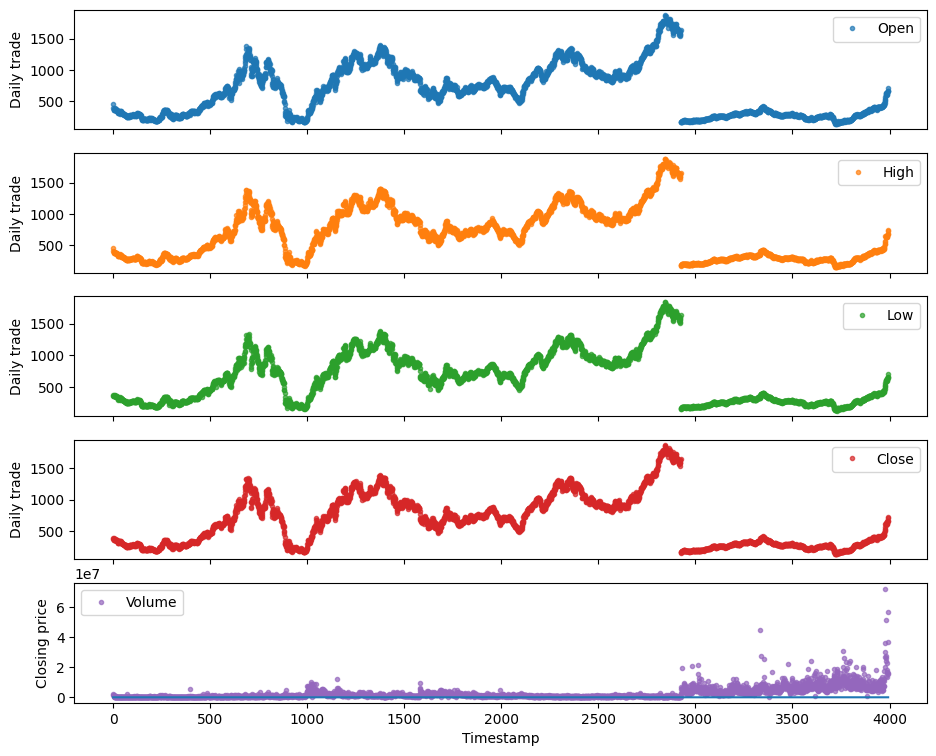

In [516]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [517]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1538
Deliverable Volume       0
%Deliverble              0
dtype: int64

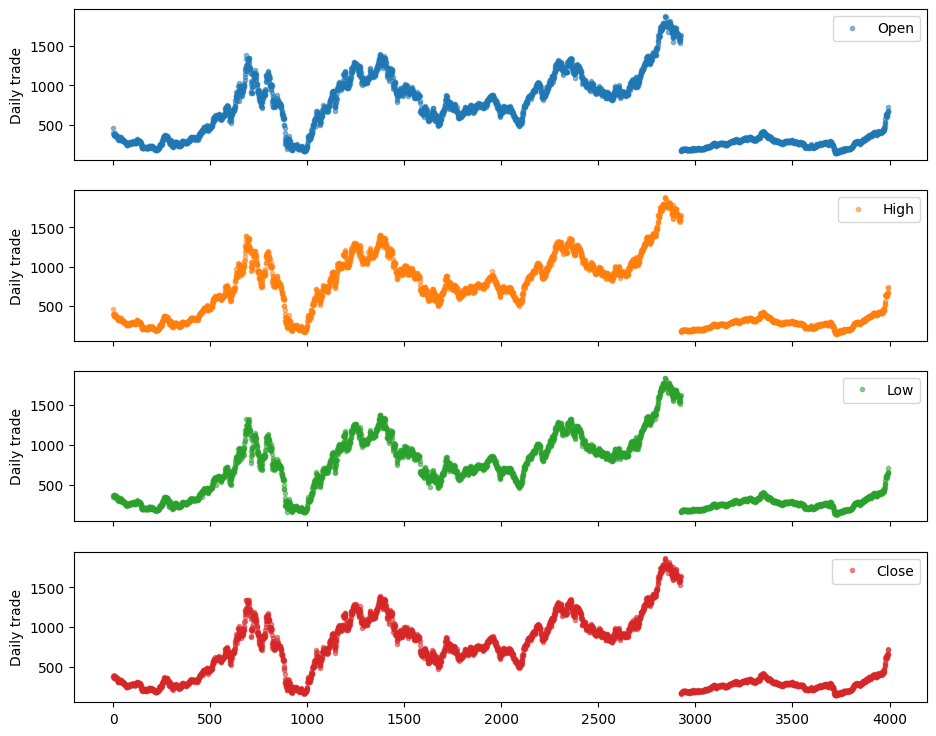

In [518]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

        Symbol Series  Prev Close    Open    High     Low    Last   Close  \
0       JSWSTL     EQ       10.00  455.00  458.50  383.60  386.90  390.15   
1       JSWSTL     EQ      390.15  392.85  398.50  357.50  371.80  369.20   
2       JSWSTL     EQ      369.20  376.70  394.05  375.00  380.00  378.85   
3       JSWSTL     EQ      378.85  382.90  383.80  363.25  369.10  368.05   
4       JSWSTL     EQ      368.05  367.00  371.90  360.05  362.70  362.15   
...        ...    ...         ...     ...     ...     ...     ...     ...   
3989  JSWSTEEL     EQ      635.40  642.00  660.70  638.25  657.00  655.80   
3990  JSWSTEEL     EQ      655.80  660.65  670.35  658.00  666.35  665.90   
3991  JSWSTEEL     EQ      665.90  669.75  676.00  650.65  662.50  662.65   
3992  JSWSTEEL     EQ      662.65  672.00  728.90  668.05  726.20  726.50   
3993  JSWSTEEL     EQ      726.50  719.60  740.00  711.45  713.70  717.85   

        VWAP    Volume      Turnover    Trades  Deliverable Volume  \
0    

,count,mean,std,min,25%,50%,75%,max
Prev Close,3994.0,6.603681e+02,3.955641e+02,1.000000e+01,2.862125e+02,6.387500e+02,9.428375e+02,1.862550e+03
Open,3994.0,6.611974e+02,3.956564e+02,1.432500e+02,2.864750e+02,6.384250e+02,9.449750e+02,1.874100e+03
High,3994.0,6.739061e+02,4.014218e+02,1.459500e+02,2.911375e+02,6.538250e+02,9.644875e+02,1.885950e+03
Low,3994.0,6.477240e+02,3.896486e+02,1.325000e+02,2.808500e+02,6.236000e+02,9.270500e+02,1.842550e+03
Last,3994.0,6.603131e+02,3.953284e+02,1.423500e+02,2.860000e+02,6.385250e+02,9.448375e+02,1.867000e+03
Close,3994.0,6.605453e+02,3.954312e+02,1.407000e+02,2.862750e+02,6.395500e+02,9.428375e+02,1.862550e+03
VWAP,3994.0,6.611444e+02,3.955196e+02,1.379100e+02,2.861400e+02,6.381400e+02,9.440450e+02,1.862710e+03
Volume,3994.0,2.680639e+06,3.942895e+06,9.694000e+03,5.515000e+05,1.079757e+06,3.457287e+06,7.200615e+07
Turnover,3994.0,1.176519e+14,1.658072e+14,4.703767e+11,4.633062e+13,8.593032e+13,1.522540e+14,4.362297e+15
Trades,2456.0,4.035703e+04,3.415823e+04,1.361000e+03,2.135075e+04,3.230250e+04,5.017450e+04,6.678210e+05


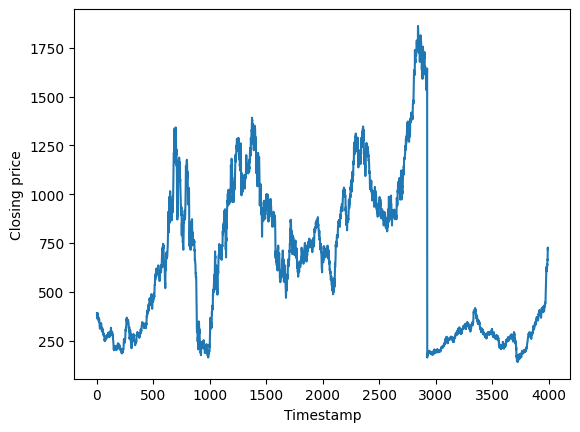

In [519]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [520]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

3113
779


In [521]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
49/49 [==============================] - 4s 25ms/step - loss: 0.1102 - mse: 0.1102 - mae: 0.1965 - val_loss: 0.0155 - val_mse: 0.0155 - val_mae: 0.0881
Epoch 2/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0116 - mse: 0.0116 - mae: 0.0706 - val_loss: 0.0063 - val_mse: 0.0063 - val_mae: 0.0575
Epoch 3/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0072 - mse: 0.0072 - mae: 0.0570 - val_loss: 0.0054 - val_mse: 0.0054 - val_mae: 0.0534
Epoch 4/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0056 - mse: 0.0056 - mae: 0.0507 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0482
Epoch 5/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0463 - val_loss: 0.0040 - val_mse: 0.0040 - val_mae: 0.0444
Epoch 6/100
49/49 [==============================] - 0s 3ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0423 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0401
Epoch 7/100
49/49 [==

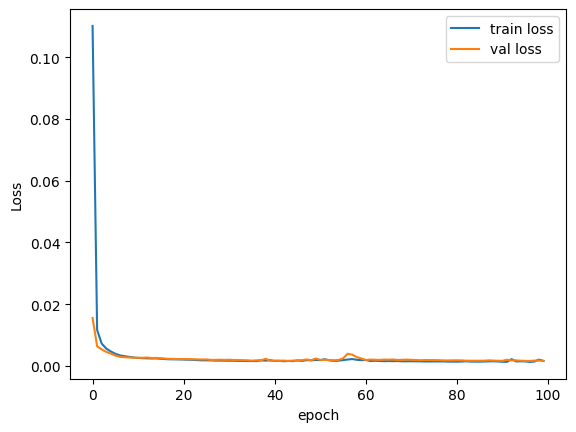

In [522]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

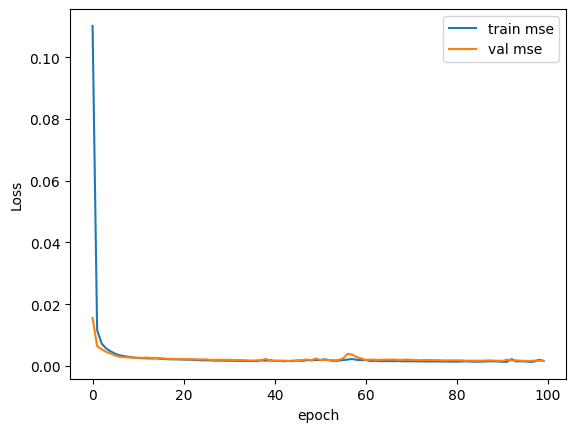

In [523]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

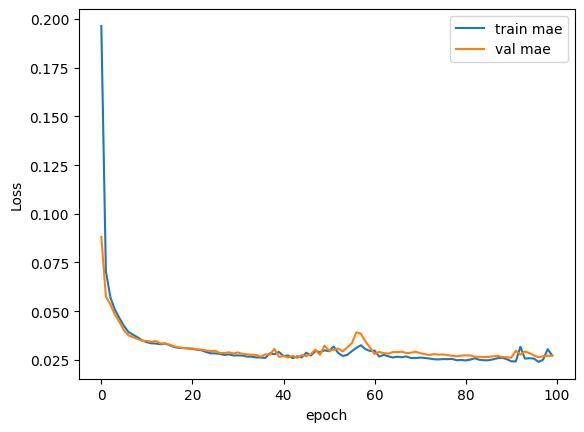

In [524]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_39 (LSTM)              (None, 32)                6272      
                                                                 
 dense_95 (Dense)            (None, 64)                2112      
                                                                 
 dense_96 (Dense)            (None, 64)                4160      
                                                                 
 activation_57 (Activation)  (None, 64)                0         
                                                                 
 dense_97 (Dense)            (None, 64)                4160      
                                                                 
 activation_58 (Activation)  (None, 64)              

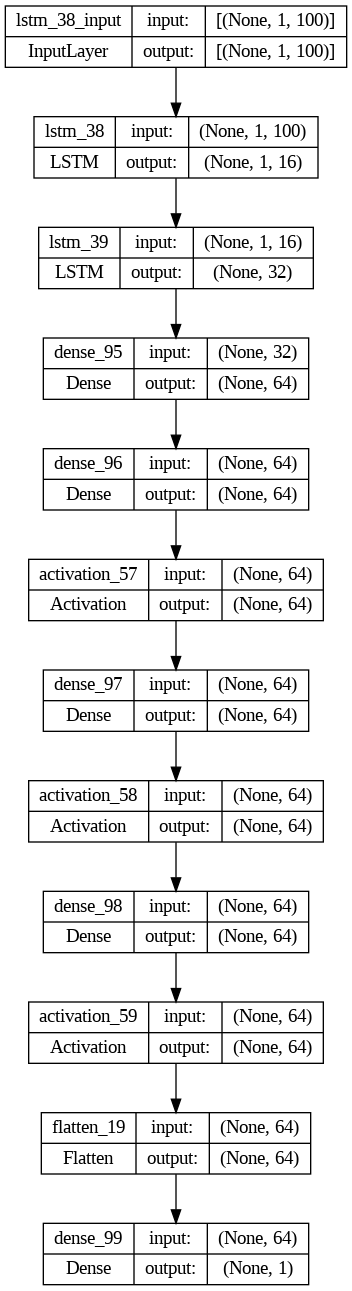

In [525]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [526]:
model.evaluate(test_X, test_Y)

25/25 [==============================] - 0s 2ms/step - loss: 0.0016 - mse: 0.0016 - mae: 0.0272


[0.0016050648409873247, 0.0016050648409873247, 0.02719121426343918]

In [527]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.992121
R2 Score: 0.991917
Max Error: 0.242372


25/25 [==============================] - 0s 1ms/step


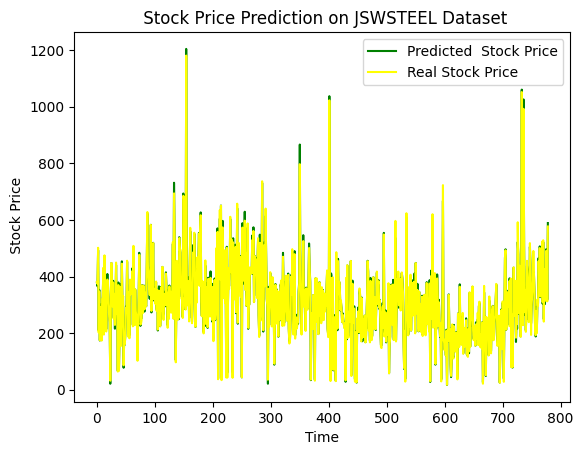

In [528]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on JSWSTEEL Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

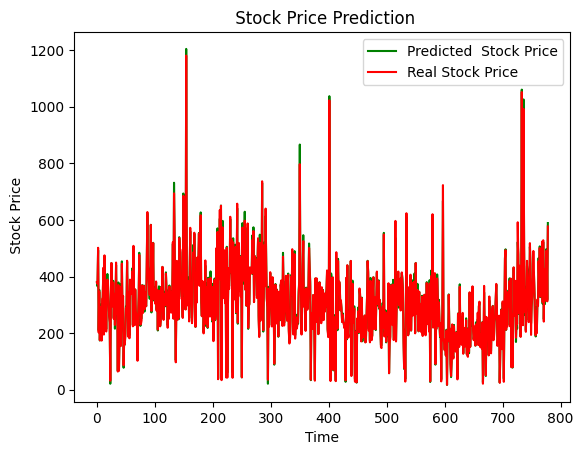

In [529]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [530]:
predicted

array([[ 378.08932 ],
       [ 365.59027 ],
       [ 492.77042 ],
       [ 209.31876 ],
       [ 352.75488 ],
       [ 173.79941 ],
       [ 284.81348 ],
       [ 300.94952 ],
       [ 176.88245 ],
       [ 295.34644 ],
       [ 329.98502 ],
       [ 412.39856 ],
       [ 196.6844  ],
       [ 471.9338  ],
       [ 319.75623 ],
       [ 369.8591  ],
       [ 213.81625 ],
       [ 364.4618  ],
       [ 408.8582  ],
       [ 368.0031  ],
       [ 319.25302 ],
       [ 267.38126 ],
       [ 238.98468 ],
       [  20.993332],
       [ 297.5989  ],
       [ 447.59314 ],
       [ 309.06616 ],
       [ 303.4565  ],
       [ 384.66196 ],
       [ 253.99315 ],
       [ 335.0038  ],
       [ 215.59723 ],
       [ 291.21323 ],
       [ 440.1447  ],
       [ 275.27963 ],
       [ 327.89075 ],
       [  66.68828 ],
       [ 378.89102 ],
       [  74.98741 ],
       [ 203.13187 ],
       [ 372.36298 ],
       [ 166.1145  ],
       [ 237.04613 ],
       [ 453.54123 ],
       [ 289.5343  ],
       [ 3

In [531]:
test_label

array([[ 380.47225806],
       [ 374.32302686],
       [ 501.51866343],
       [ 202.02743219],
       [ 346.32676285],
       [ 174.75487089],
       [ 289.99505119],
       [ 291.22571122],
       [ 173.38424242],
       [ 320.70563272],
       [ 324.61260097],
       [ 430.64527152],
       [ 194.79961722],
       [ 474.74462366],
       [ 315.91066237],
       [ 354.18916291],
       [ 205.55141707],
       [ 362.84598042],
       [ 389.13829787],
       [ 378.68783679],
       [ 317.79847434],
       [ 259.08955523],
       [ 237.69925553],
       [  31.72302358],
       [ 294.71918446],
       [ 447.72865497],
       [ 304.26706886],
       [ 294.11091549],
       [ 378.90552564],
       [ 250.09026379],
       [ 338.45054086],
       [ 228.82989877],
       [ 297.26786059],
       [ 449.325549  ],
       [ 269.07871938],
       [ 336.38509069],
       [  64.01756025],
       [ 369.63649648],
       [  66.42922713],
       [ 198.58608311],
       [ 362.59691405],
       [ 153.840

In [532]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

     Actual Price  Predicted Price
0      380.472258       378.089325
1      374.323027       365.590271
2      501.518663       492.770416
3      202.027432       209.318756
4      346.326763       352.754883
..            ...              ...
774    377.724248       388.313080
775    490.356639       496.128235
776    485.343887       492.945526
777    312.202323       317.956635
778    576.772415       588.931274

[779 rows x 2 columns]


In [533]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+-----+--------------------+--------------------+
|     |    Actual Price    |  Predicted Price   |
+-----+--------------------+--------------------+
|  0  | 380.47225806451615 | 378.0893249511719  |
|  1  | 374.32302686072654 | 365.59027099609375 |
|  2  | 501.51866343490303 | 492.7704162597656  |
|  3  | 202.0274321880651  | 209.31875610351562 |
|  4  | 346.32676285307866 |   352.7548828125   |
|  5  | 174.7548708920188  | 173.79940795898438 |
|  6  | 289.99505119453926 |   284.8134765625   |
|  7  | 291.2257112184648  | 300.94952392578125 |
|  8  | 173.38424242424244 | 176.8824462890625  |
|  9  | 320.7056327160494  |  295.346435546875  |
| 10  | 324.61260096930533 | 329.9850158691406  |
| 11  | 430.6452715198386  | 412.3985595703125  |
| 12  | 194.79961722488036 | 196.6844024658203  |
| 13  |  474.744623655914  | 471.9338073730469  |
| 14  | 315.91066237038467 | 319.7562255859375  |
| 15  | 354.18916291202277 | 369.8591003417969  |
| 16  | 205.55141707337955 | 213.81625366210938 |


In [534]:
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_38 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_39 (LSTM)              (None, 32)                6272      
                                                                 
 dense_95 (Dense)            (None, 64)                2112      
                                                                 
 dense_96 (Dense)            (None, 64)                4160      
                                                                 
 activation_57 (Activation)  (None, 64)                0         
                                                                 
 dense_97 (Dense)            (None, 64)                4160      
                                                                 
 activation_58 (Activation)  (None, 64)              

In [535]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))